In [1]:
from sklearn.datasets import load_boston
import statsmodels.api as sm

### '보스턴 집값' 데이터셋 생성

In [2]:
boston = load_boston()
dfX = pd.DataFrame(boston.data, columns=boston.feature_names)
dfy = pd.DataFrame(boston.target, columns=["MEDV"])
df0 = pd.concat([dfX, dfy], axis=1)
df = sm.add_constant(df0)
df.tail()

,const,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
501,1,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,1,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,1,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,1,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0
505,1,0.04741,0.0,11.93,0.0,0.573,6.030,80.8,2.5050,1.0,273.0,21.0,396.90,7.88,11.9


In [16]:
print boston.DESCR

Boston House Prices dataset

Notes
------
Data Set Characteristics:  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive
    
    :Median Value (attribute 14) is usually the target

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pupil-teacher ratio by town
      

### 기본적인 회귀분석

In [14]:
#상수항 없는 회귀분석
model0 = sm.OLS(df0.ix[:,-1], df0.ix[:,:-1])
result0 = model0.fit()
print result0.summary()

                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.959
Model:                            OLS   Adj. R-squared:                  0.958
Method:                 Least Squares   F-statistic:                     891.1
Date:                Fri, 07 Apr 2017   Prob (F-statistic):               0.00
Time:                        22:08:41   Log-Likelihood:                -1523.8
No. Observations:                 506   AIC:                             3074.
Df Residuals:                     493   BIC:                             3129.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
CRIM          -0.0916      0.034     -2.675      0.0

In [3]:
#상수항 있는 회귀분석
model = sm.OLS(df.ix[:,-1], df.ix[:,:-1])
result = model.fit()
print result.summary()

                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.741
Model:                            OLS   Adj. R-squared:                  0.734
Method:                 Least Squares   F-statistic:                     108.1
Date:                Sat, 22 Apr 2017   Prob (F-statistic):          6.95e-135
Time:                        14:44:30   Log-Likelihood:                -1498.8
No. Observations:                 506   AIC:                             3026.
Df Residuals:                     492   BIC:                             3085.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const         36.4911      5.104      7.149      0.0

### Outlier 검출 및 제거

In [4]:
influence = result.get_influence()
hat = influence.hat_matrix_diag
resid = result.resid

In [5]:
cook0, p_val = influence.cooks_distance
idx = np.where(cook0 > 4/float(len(df['MEDV'])-2))[0]
idx

array([ 64, 141, 148, 161, 162, 163, 166, 186, 195, 204, 214, 225, 228,
       233, 253, 262, 267, 364, 365, 367, 368, 369, 370, 371, 372, 374,
       375, 380, 412, 414])

In [6]:
df_outlier = df.drop(idx, axis=0)

In [7]:
model_outlier = sm.OLS(df_outlier.ix[:,-1], df_outlier.ix[:,:-1])
result_outlier = model_outlier.fit()
print result_outlier.summary()

                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.831
Model:                            OLS   Adj. R-squared:                  0.827
Method:                 Least Squares   F-statistic:                     175.4
Date:                Sat, 22 Apr 2017   Prob (F-statistic):          3.07e-169
Time:                        14:44:40   Log-Likelihood:                -1226.7
No. Observations:                 476   AIC:                             2481.
Df Residuals:                     462   BIC:                             2540.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const         20.9186      4.002      5.227      0.0

### ANOVA 분석

In [9]:
model = sm.OLS.from_formula("MEDV ~ CRIM + ZN + INDUS + NOX + RM + AGE + DIS + RAD + TAX + PTRATIO + B + LSTAT +C(CHAS)", data=df_outlier)
result = model.fit()
table = sm.stats.anova_lm(result)
table

,df,sum_sq,mean_sq,F,PR(>F)
C(CHAS),1.0,342.786562,342.786562,32.816577,1.827811e-08
CRIM,1.0,6054.849667,6054.849667,579.659357,1.360106e-83
ZN,1.0,3496.296799,3496.296799,334.717006,1.223114e-56
INDUS,1.0,2955.811358,2955.811358,282.973782,7.011233e-50
NOX,1.0,54.034088,54.034088,5.172938,2.339906e-02
RM,1.0,7067.106487,7067.106487,676.567483,1.567437e-92
AGE,1.0,249.159475,249.159475,23.853213,1.435288e-06
DIS,1.0,953.622563,953.622563,91.294792,7.334166e-20
RAD,1.0,243.861255,243.861255,23.345990,1.844333e-06
TAX,1.0,319.447983,319.447983,30.582264,5.363456e-08


### 페어플롯으로 변수 특성 파악
1. Log 변환 : CRIM, ZN, DIS, AGE(?), B
2. 2차식 : LSTAT

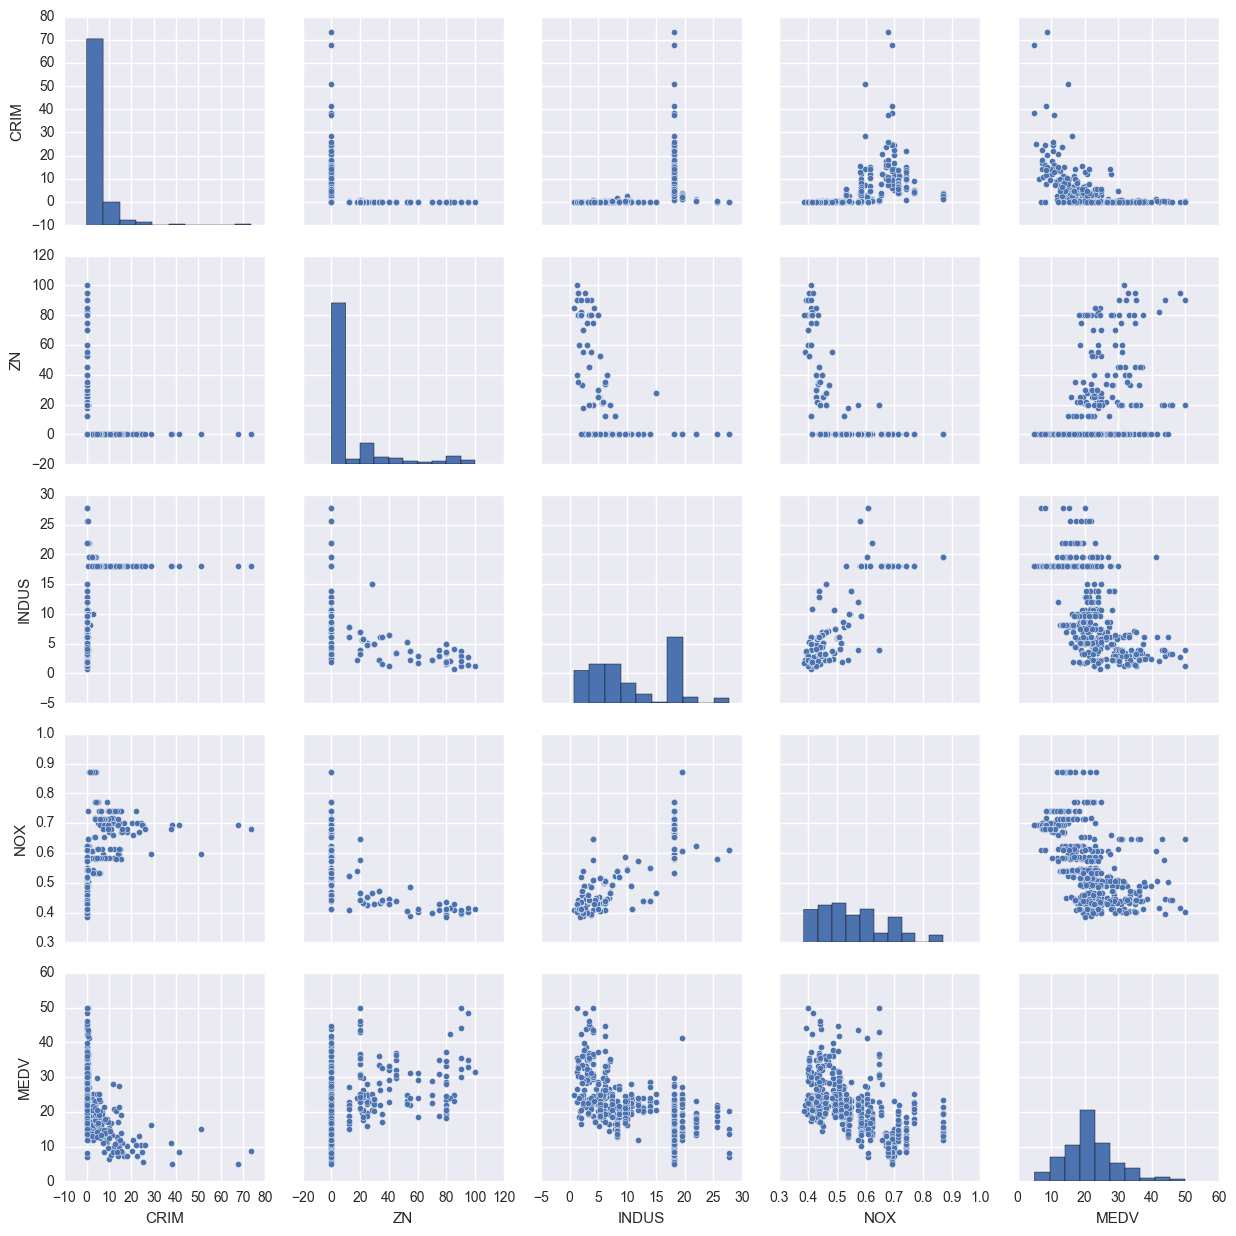

In [10]:
sns.pairplot(df_outlier.ix[:,['CRIM', 'ZN', 'INDUS', 'NOX', 'MEDV']])
plt.show()

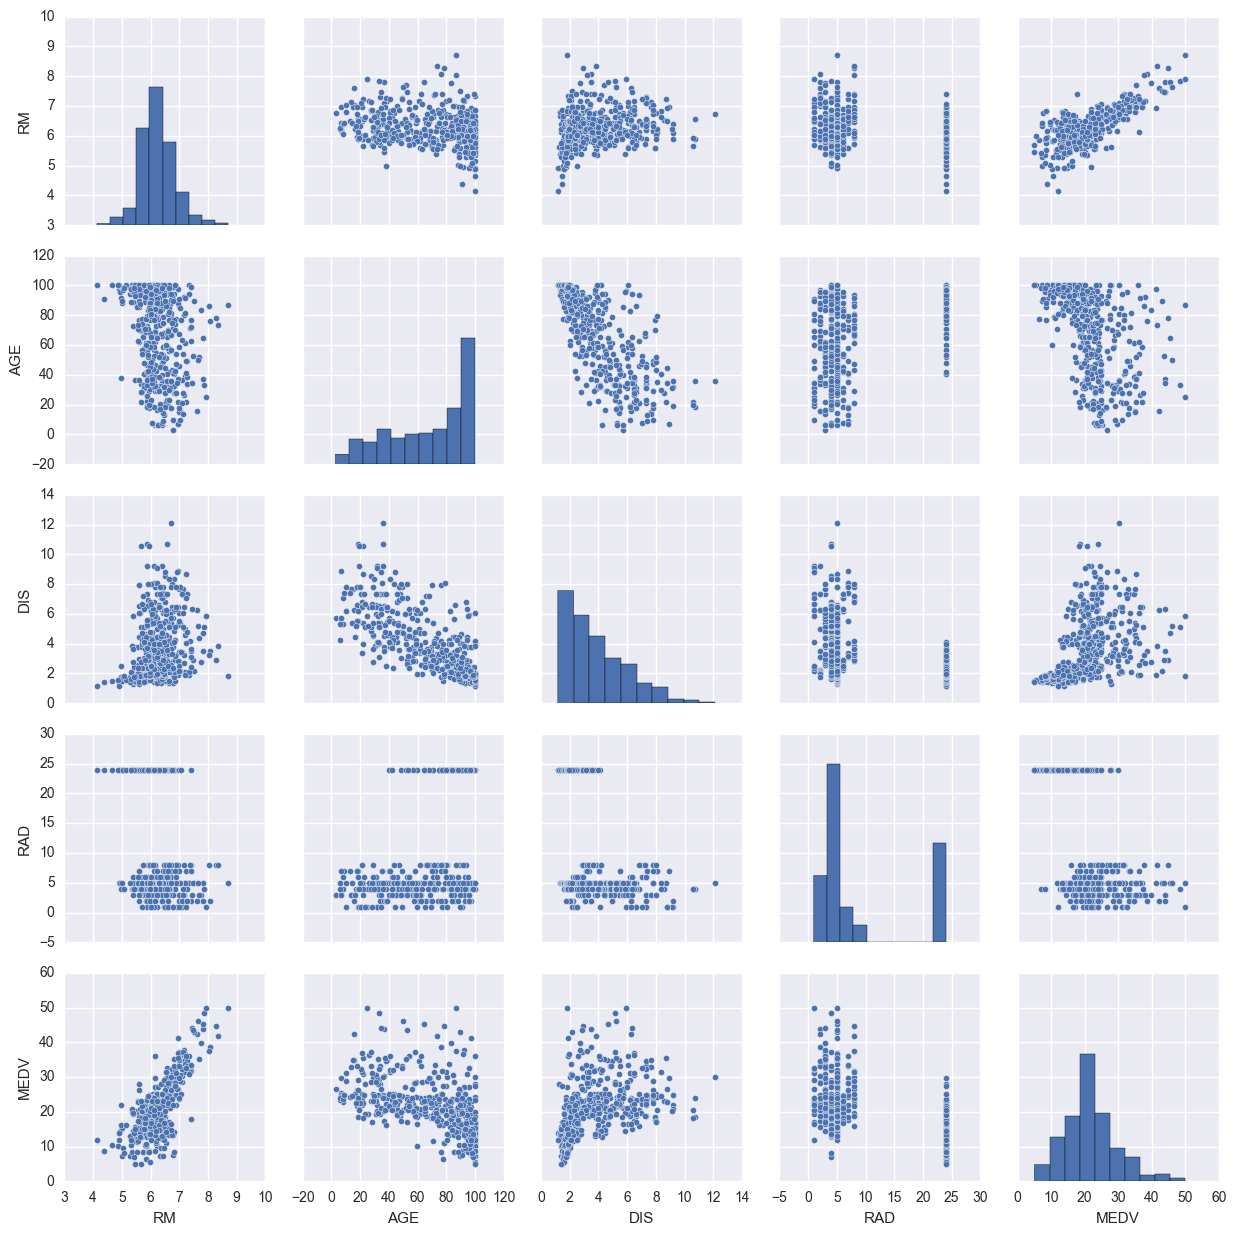

In [11]:
sns.pairplot(df_outlier.ix[:,['RM', 'AGE', 'DIS', 'RAD', 'MEDV']])
plt.show()

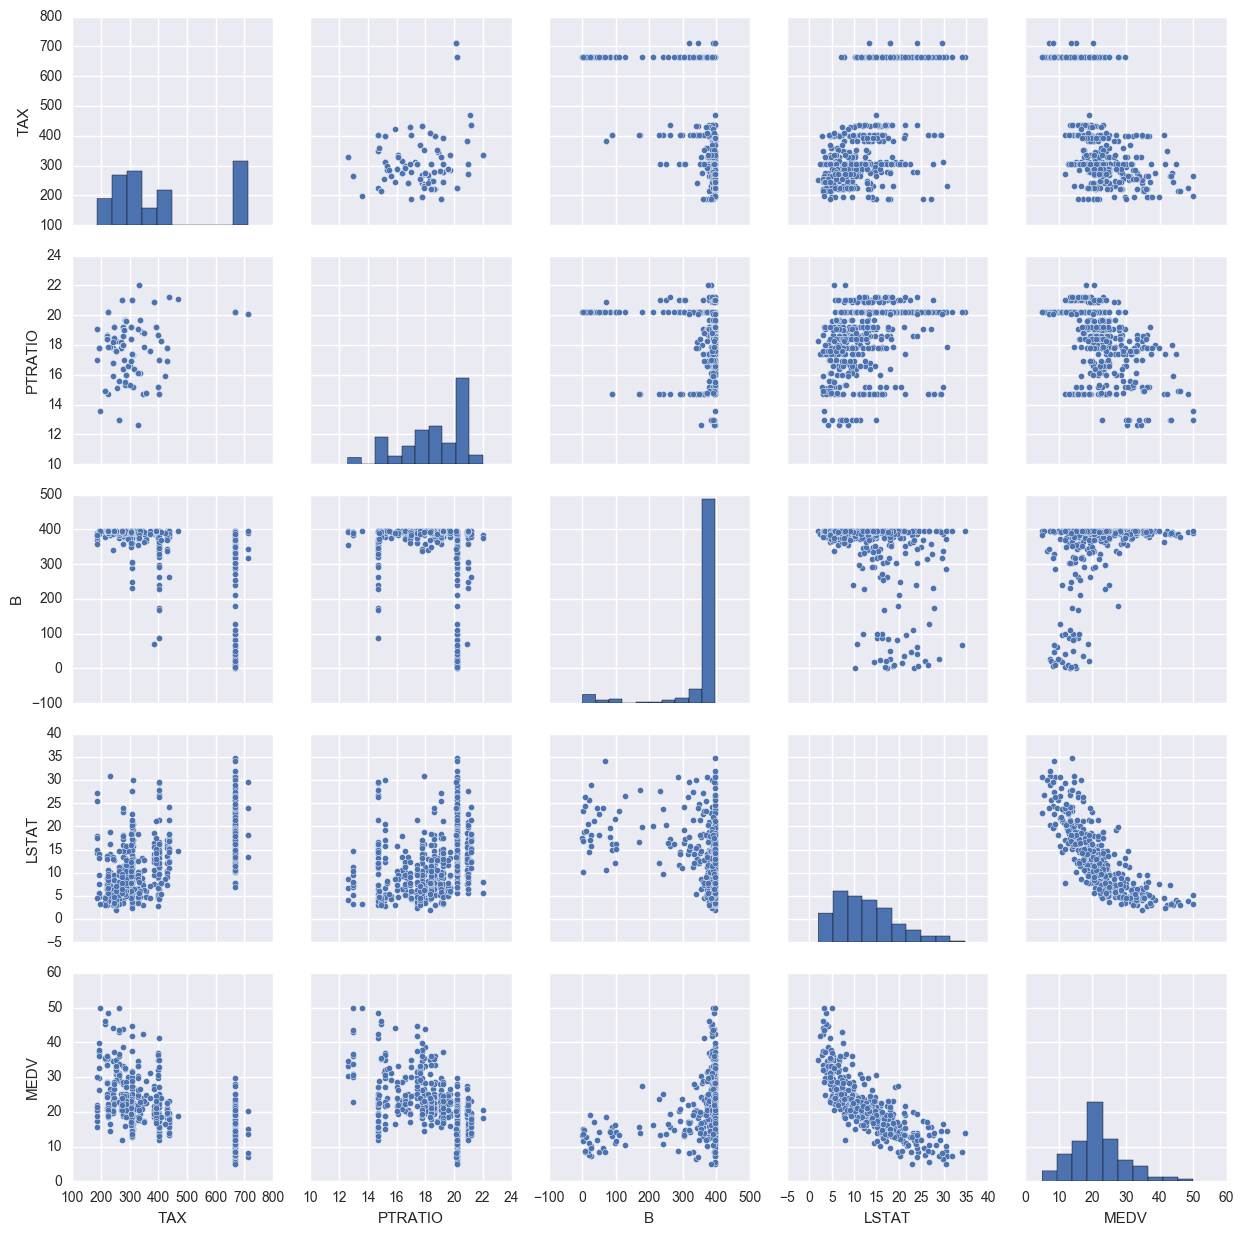

In [12]:
sns.pairplot(df_outlier.ix[:,['TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']])
plt.show()

### 로그변환
1. CRIM, DIS 는 데이터가 펼쳐짐
2. ZN, B, AGE 는 변화 없음
3. LSTAT도 선형꼴이 됨

In [41]:
df_log = df_outlier.copy()

In [42]:
df_log['CRIM'] = np.log(df_log['CRIM'])
df_log['DIS'] = np.log(df_log['DIS'])
df_log['LSTAT'] = np.log(df_log['LSTAT'])

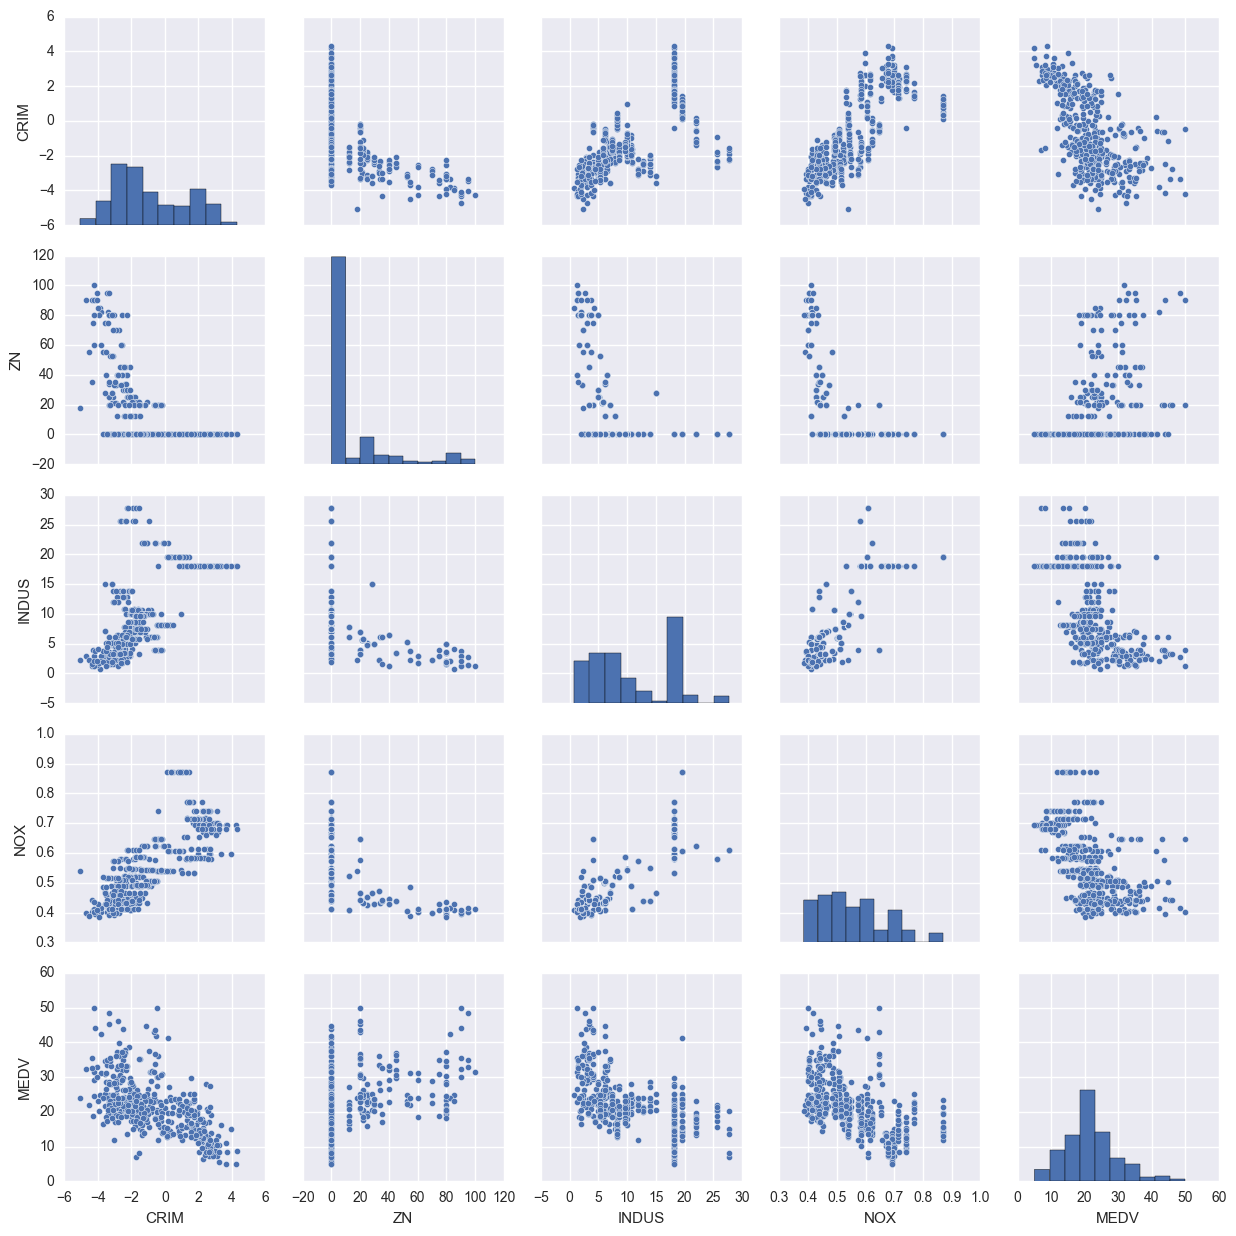

In [57]:
sns.pairplot(df_log.ix[:,['CRIM', 'ZN', 'INDUS', 'NOX', 'MEDV']])
plt.show()

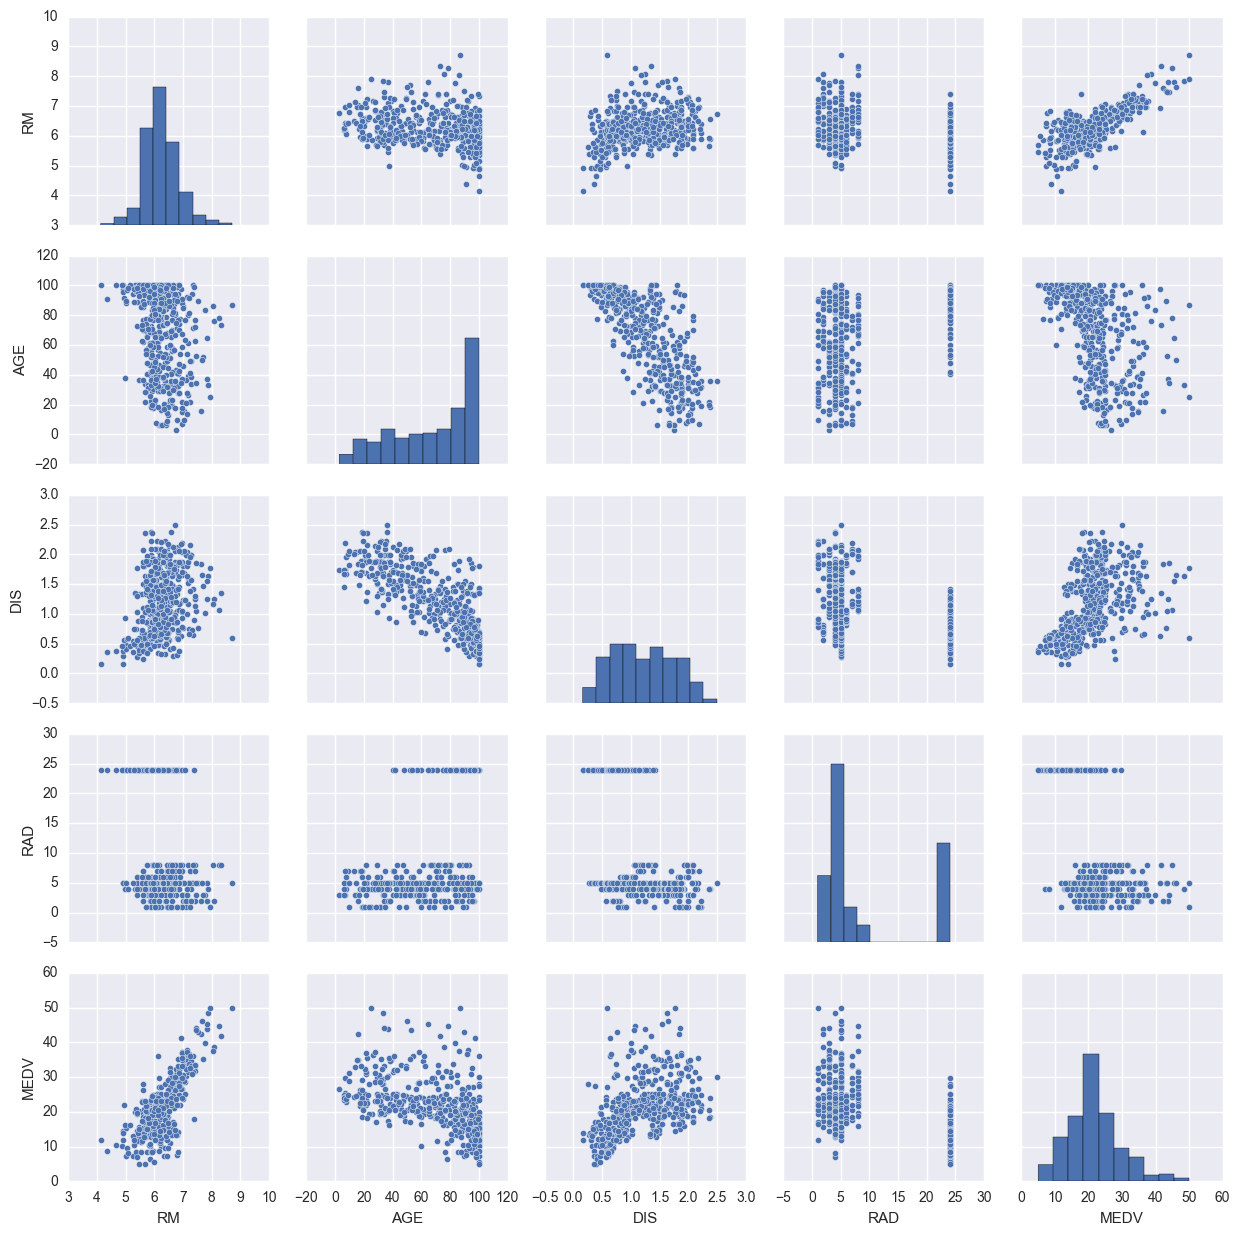

In [58]:
sns.pairplot(df_log.ix[:,['RM', 'AGE', 'DIS', 'RAD', 'MEDV']])
plt.show()

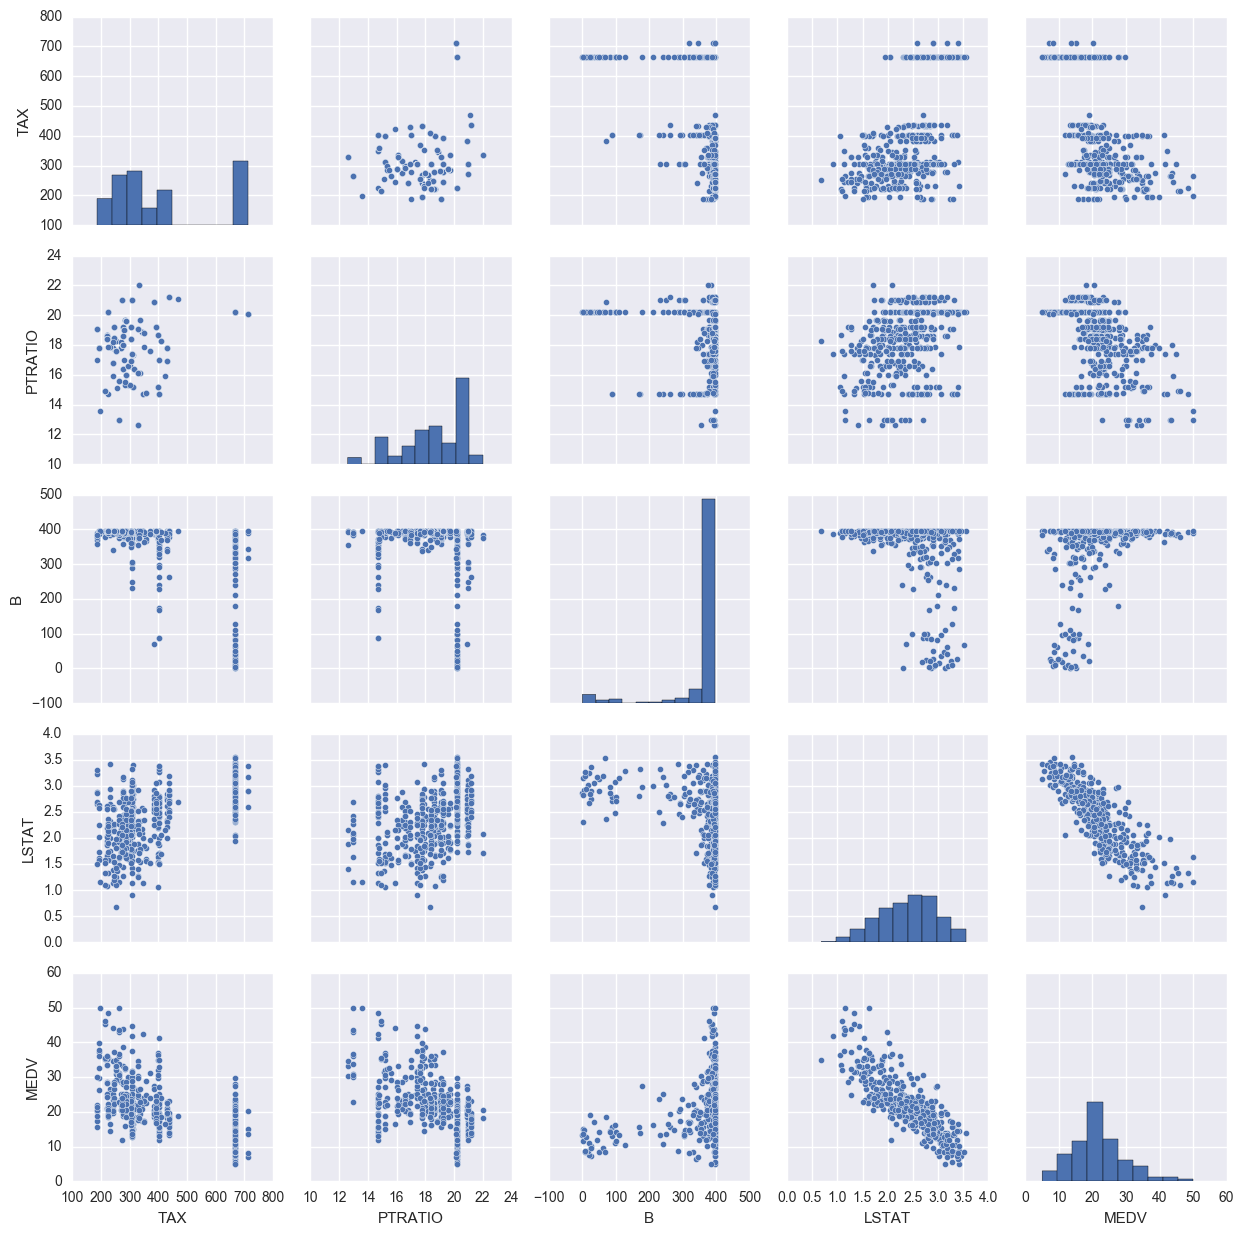

In [59]:
sns.pairplot(df_log.ix[:,['TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']])
plt.show()

In [46]:
model_log = sm.OLS(df_log.ix[:,-1], df_log.ix[:,:-1])
result = model_log.fit()
print result.summary()

                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.836
Model:                            OLS   Adj. R-squared:                  0.832
Method:                 Least Squares   F-statistic:                     181.5
Date:                Sat, 22 Apr 2017   Prob (F-statistic):          4.23e-172
Time:                        16:02:36   Log-Likelihood:                -1219.9
No. Observations:                 476   AIC:                             2468.
Df Residuals:                     462   BIC:                             2526.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const         32.6852      4.467      7.317      0.0

### 히트맵으로 독립변수간 상관관계 파악

In [52]:
result.cov_params()

,const,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
const,19.955103,0.053307,-1.646664e-03,0.001362,-0.019983,-6.624474,-1.325038,9.387720e-03,-0.964238,4.535118e-02,-1.011504e-03,-0.181474,-2.581446e-03,-1.310851
CRIM,0.053307,0.036265,3.292929e-04,-0.000370,0.001940,-0.125326,0.009072,-2.683346e-04,0.009016,-5.512160e-03,1.920852e-05,0.001410,5.615454e-05,-0.001925
ZN,-0.001647,0.000329,8.255333e-05,0.000043,-0.000002,-0.000028,-0.000228,8.593129e-06,-0.001223,-6.334103e-06,-5.661143e-06,0.000250,7.050437e-07,0.000135
INDUS,0.001362,-0.000370,4.313502e-05,0.001827,-0.002235,-0.023975,0.001280,2.113760e-05,0.006421,5.387029e-04,-4.288194e-05,-0.000554,2.386392e-06,-0.001835
CHAS,-0.019983,0.001940,-1.963327e-06,-0.002235,0.396616,-0.128611,-0.005257,-1.872052e-04,-0.013078,-2.918692e-03,2.366268e-04,0.006126,-5.036089e-05,-0.003851
NOX,-6.624474,-0.125326,-2.765684e-05,-0.023975,-0.128611,8.078491,0.100102,-5.057591e-03,0.633835,1.435177e-03,-4.788576e-04,0.069168,2.942140e-04,0.030199
RM,-1.325038,0.009072,-2.277173e-04,0.001280,-0.005257,0.100102,0.146426,-1.402760e-03,0.013837,-4.290544e-03,5.036079e-05,0.004408,1.362122e-04,0.132956
AGE,0.009388,-0.000268,8.593129e-06,0.000021,-0.000187,-0.005058,-0.001403,1.037099e-04,0.002042,7.676379e-05,3.072738e-07,-0.000086,-2.233717e-06,-0.002651
DIS,-0.964238,0.009016,-1.222590e-03,0.006421,-0.013078,0.633835,0.013837,2.041642e-03,0.376147,-1.256587e-03,6.375222e-05,-0.004433,1.864465e-05,-0.022623
RAD,0.045351,-0.005512,-6.334103e-06,0.000539,-0.002919,0.001435,-0.004291,7.676379e-05,-0.001257,2.745367e-03,-9.221266e-05,-0.000933,-8.775885e-07,-0.001731


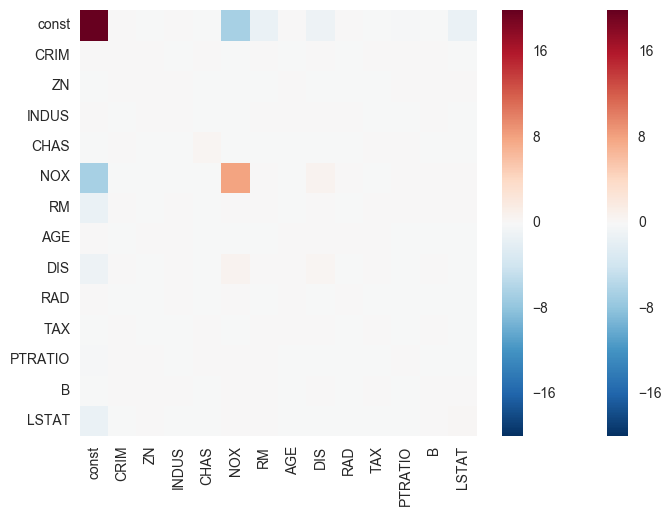

In [50]:
sns.heatmap(result.cov_params())
plt.show()

### 유의하지 않은 변수 제거

In [56]:
df_drop = df_log.drop(['ZN', 'INDUS', 'CRIM', 'AGE'], axis=1)
model_drop = sm.OLS(df_drop.ix[:,-1], df_drop.ix[:,:-1])
result_drop = model_drop.fit()
print result_drop.summary()

                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.836
Model:                            OLS   Adj. R-squared:                  0.833
Method:                 Least Squares   F-statistic:                     263.7
Date:                Sat, 22 Apr 2017   Prob (F-statistic):          1.21e-176
Time:                        16:20:49   Log-Likelihood:                -1220.4
No. Observations:                 476   AIC:                             2461.
Df Residuals:                     466   BIC:                             2502.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const         33.7167      4.322      7.801      0.0

### 검열 데이터 처리
+ B, ZN, RAD(?)

In [28]:
test = np.ones(10) * 100
dft = pd.DataFrame(test)
dft[0] = np.log10(dft[0])

In [30]:
dft[0] = dft[0] + 0.1
dft

,0
0,2.1
1,2.1
2,2.1
3,2.1
4,2.1
5,2.1
6,2.1
7,2.1
8,2.1
9,2.1
